<a href="https://colab.research.google.com/github/marcinwolter/DeepLearning_2020/blob/main/simple_mnist_mdn_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST dense net with Mixture Density Network
A skeleton!

Based on:
https://keras.io/examples/vision/mnist_convnet/ 

## Setup

In [81]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt


## Prepare the data

In [82]:

def prepare_data(x_train, y_train, x_test, y_test,num_classes):
  #Select 2 classes
  N_CLASSES = num_classes

  indices = np.where(y_train < N_CLASSES) # if few classes needed
  indices = indices[0]
  np.random.shuffle(indices)
  x_train = x_train[indices]
  y_train = y_train[indices]

  indices = np.where(y_test < N_CLASSES) # if few  classes only
  indices = indices[0]
  np.random.shuffle(indices)
  x_test = x_test[indices]
  y_test = y_test[indices]

  # Scale images to the [0, 1] range
  x_train = x_train.astype("float32") / 255
  x_test = x_test.astype("float32") / 255
  # Make sure images have shape (28, 28, 1)
  x_train = np.expand_dims(x_train, -1)
  x_test = np.expand_dims(x_test, -1)
  print("x_train shape:", x_train.shape)
  print(x_train.shape[0], "train samples")
  print(x_test.shape[0], "test samples")


  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  
  return x_train, y_train, x_test, y_test

In [83]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, y_train, x_test, y_test = prepare_data(x_train, y_train, x_test, y_test,num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# **Install keras-mdn-layer**

In [84]:
#! pip install keras-mdn-layer
#import mdn

Parameters for MDN

In [85]:
N_HIDDEN = 64 #256  # number of hidden units in the Dense layer
#N_MIXES = 1  # number of mixture components
OUTPUT_DIMS = num_classes  # number of real-values predicted by each mixture component


## Build the model

In [86]:
model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(layers.Flatten())
model.add(layers.Dense(N_HIDDEN, activation="relu"))
model.add(layers.Dense(N_HIDDEN, activation="relu"))
model.add(layers.Dense(N_HIDDEN, activation="relu"))

model.add(layers.Dense(OUTPUT_DIMS, activation="softmax"))


model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [87]:
batch_size = 128
epochs = 30

# This is for normal dense network
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test)) #validation_split=0.1)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.7260 - accuracy: 0.7822 - val_loss: 0.1702 - val_accuracy: 0.9480
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1627 - accuracy: 0.9512 - val_loss: 0.1415 - val_accuracy: 0.9553
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1181 - accuracy: 0.9631 - val_loss: 0.1247 - val_accuracy: 0.9618
Epoch 4/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0930 - accuracy: 0.9716 - val_loss: 0.1128 - val_accuracy: 0.9656
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0776 - accuracy: 0.9763 - val_loss: 0.1093 - val_accuracy: 0.9666
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0626 - accuracy: 0.9808 - val_loss: 0.1030 - val_accuracy: 0.9701
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0526 - accuracy: 0.9843 - val_loss: 0.1009 - val_accuracy: 0.9690
Epoch 

# **Model prediction with MDN**

In [88]:
y_test_out = model.predict(x_test)



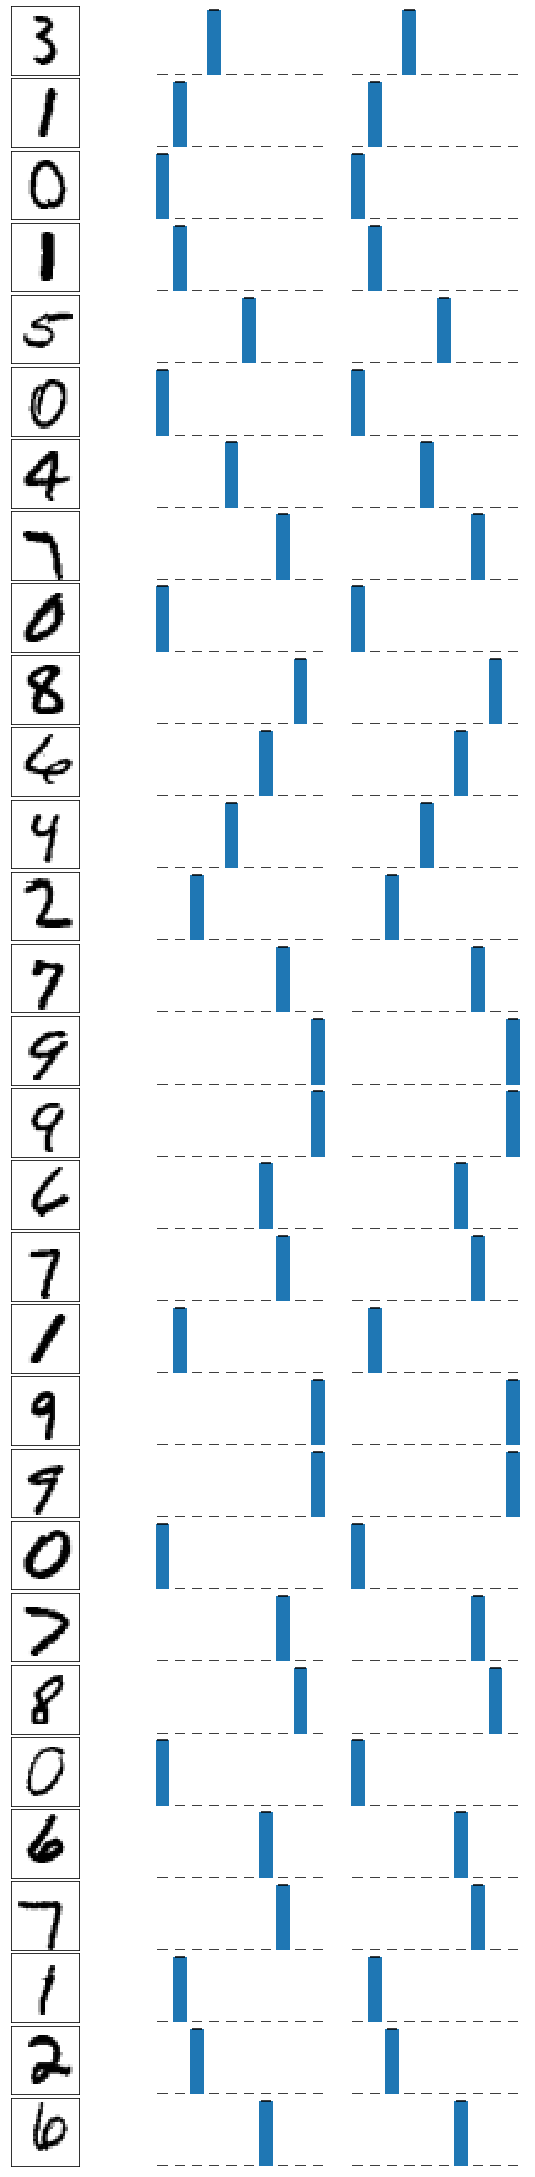

In [89]:
# use the model to predict the labels of the test data



# Plot the prediction
fig = plt.figure(figsize=(8, 30))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
n_img=30
for i in range(n_img):
    ax = fig.add_subplot(n_img, 3, 3*i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

    ax = fig.add_subplot(n_img, 3, 3*i + 2, xticks=[0,1,2,3,4,5,6,7,8,9], yticks=[])
    xbar = np.linspace(1, OUTPUT_DIMS, num=OUTPUT_DIMS)
###    ax.bar(xbar,mus[i],yerr=sigs[i],xerr=0.3,)
    ax.bar(xbar,y_test_out[i],yerr=0,xerr=0.3,)
    ax.axis('off')

    ax = fig.add_subplot(n_img, 3, 3*i + 3, xticks=[0,1,2,3,4,5,6,7,8,9], yticks=[])
    xbar = np.linspace(1, OUTPUT_DIMS, num=OUTPUT_DIMS)
    ax.bar(xbar,y_test[i],yerr=0.0,xerr=0.3)
    ax.axis('off')

    #print(mus[i])
    #print(sigs[i])
    #print(pis[i])

#print("Average error on probability = ",np.mean(sigs))    

# **Load fashion MNIST**

In [90]:
# Model / data parameters
num_classes_f = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(xf_train, yf_train), (xf_test, yf_test) = keras.datasets.fashion_mnist.load_data()

xf_train, yf_train, xf_test, yf_test = prepare_data(xf_train, yf_train, xf_test, yf_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# **Test fashion MNIST using the network trained on digits**

In [91]:
yf_test_out = model.predict(xf_test)


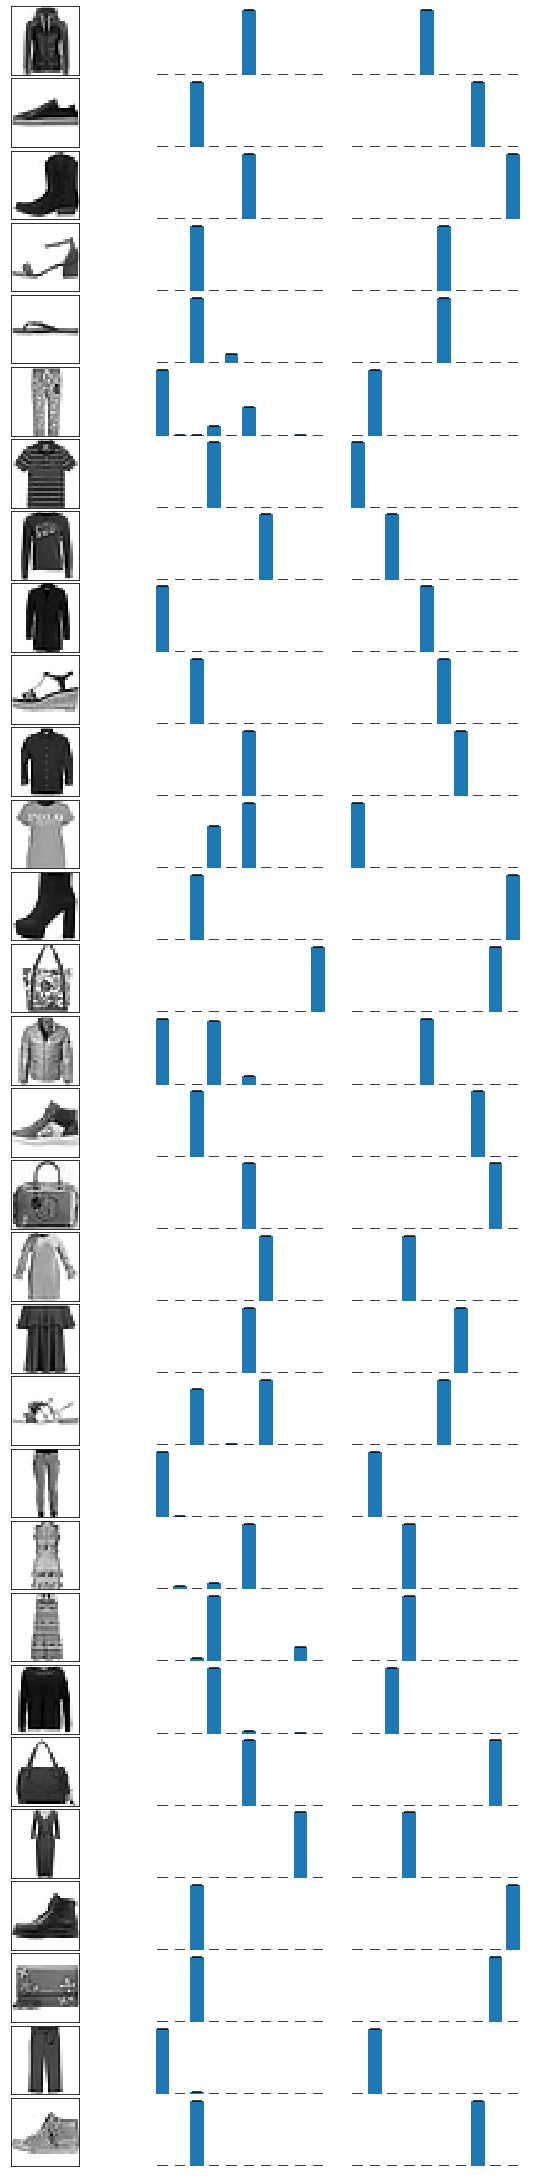

In [92]:
# use the model to predict the labels of the test data



# Plot the prediction
fig = plt.figure(figsize=(8, 30))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
n_img=30
for i in range(n_img):
    ax = fig.add_subplot(n_img, 3, 3*i + 1, xticks=[], yticks=[])
    ax.imshow(xf_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

    ax = fig.add_subplot(n_img, 3, 3*i + 2, xticks=[0,1,2,3,4,5,6,7,8,9], yticks=[])
    xbar = np.linspace(1, OUTPUT_DIMS, num=OUTPUT_DIMS)
    ax.bar(xbar,yf_test_out[i],yerr=0.,xerr=0.3)  #,yerr=sigsf[i]
    ax.axis('off')

    ax = fig.add_subplot(n_img, 3, 3*i + 3, xticks=[0,1,2,3,4,5,6,7,8,9], yticks=[])
    xbar = np.linspace(1, OUTPUT_DIMS, num=OUTPUT_DIMS)
    ax.bar(xbar,yf_test[i],yerr=0.0,xerr=0.3)
    ax.axis('off')

    

#print("Average error on probability = ",np.mean(sigsf))    